In [298]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import date, datetime
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
import random


In [299]:
ratings = pd.read_csv("data/ratings.csv",parse_dates = True,sep=",")
movies = pd.read_csv("data/movies.csv",parse_dates = True,sep=",")

ratings_n = ratings.set_index(['movieId'])
movies_n = movies.set_index(['movieId'])

In [300]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [301]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [302]:
#####movies EDA

In [303]:
df = movies.dropna()

In [304]:
df.shape

(9742, 3)

In [305]:
#remove ny duplicated rows
movies.drop_duplicates( keep="first", inplace=True)

In [306]:
movies.shape


(9742, 3)

In [307]:
movies.duplicated().sum()

0

In [308]:
#remove any duplicates based on movie title columns
movies.drop_duplicates(subset =['title'] ,keep="first", inplace=True)

In [309]:
movies.shape

(9737, 3)

In [310]:
##drop any movie ids in movies that do not appear in the rating table
movies = movies[movies['movieId'].isin(ratings['movieId'])]

In [311]:
movies.shape

(9719, 3)

In [312]:
#extract year from movies titles

In [313]:
movies['movie_year']  = movies['title'].str.extract('\((\d{4})\)')

In [314]:
##split the genres column into individual values
df2 = pd.DataFrame(movies['genres'].str.split("|").values.tolist())

In [315]:
####Movies table further EDA

In [316]:
movies['genres'].nunique()

951

In [317]:
movies['genres'].value_counts() > 10

Drama                                                   True
Comedy                                                  True
Comedy|Drama                                            True
Comedy|Romance                                          True
Drama|Romance                                           True
                                                       ...  
Adventure|Animation|Children|Comedy|Musical|Romance    False
Action|Adventure|Animation|Comedy|Crime|Mystery        False
Children|Comedy|Fantasy|Sci-Fi                         False
Crime|Horror|Sci-Fi                                    False
Action|Animation|Comedy|Fantasy                        False
Name: genres, Length: 951, dtype: bool

In [318]:
#####EDA on the ratings dataset

In [319]:
ratings.shape

(100836, 4)

In [320]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [321]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [322]:
#unique userrs and unique movies
ratings['userId'].nunique(), ratings['movieId'].nunique()

(610, 9724)

In [323]:
#check missing values
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [324]:
print("mean is:" + str(ratings['rating'].mean() ) )
print("mode is: " + str(ratings['rating'].mode())  )

mean is:3.501556983616962
mode is: 0    4.0
Name: rating, dtype: float64


In [351]:
rating_user = ratings.groupby('userId').count()
rating_user

,movieId,rating,timestamp
userId,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44
...,...,...,...
606,1115,1115,1115
607,187,187,187
608,831,831,831


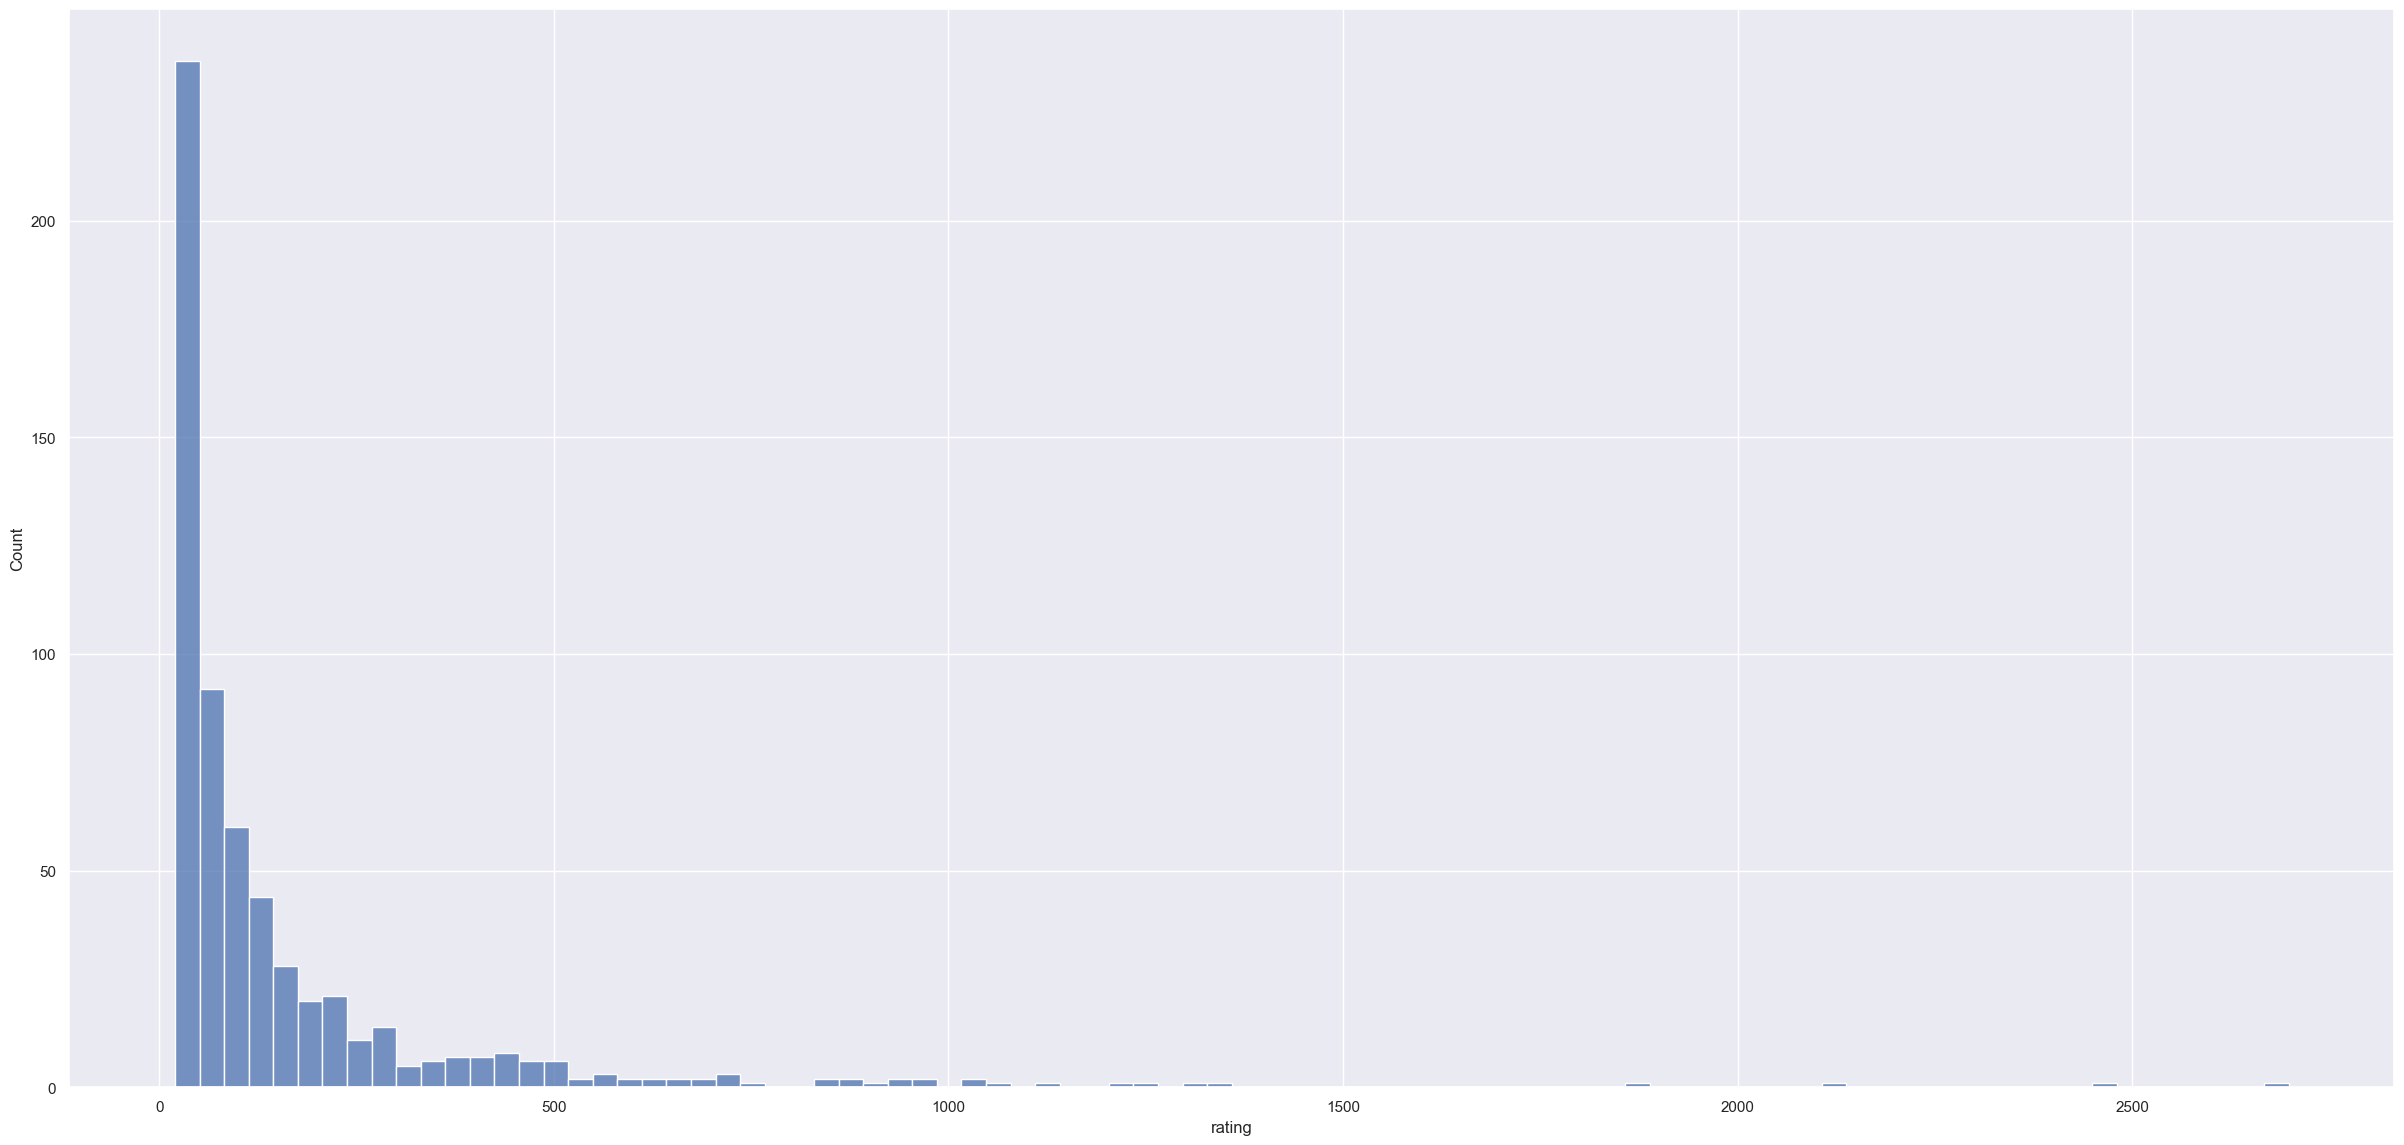

In [356]:
sns.histplot(data=rating_user, x='rating')
sns.set(rc={'figure.figsize':(25,12)})

In [357]:
ratings_overview = ratings_overview[ratings_overview['number_ratings'] > 20]

NameError: name 'ratings_overview' is not defined

In [325]:
ctab2 = pd.crosstab(index=ratings['userId'], columns='rating'.count)
ctab2

col_0,<built-in method count of str object at 0x0000015C01D08B30>
userId,
1,232
2,29
3,39
4,216
5,44
...,...
606,1115
607,187
608,831


In [326]:
ctab1 = pd.crosstab(index=ratings['rating'], columns='rating'.count)
ctab1

col_0,<built-in method count of str object at 0x0000015C01D08B30>
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [327]:
avg_rating_PM = ratings.groupby(['movieId','userId'] ).mean('rating')
avg_rating_PM

rating     timestamp
movieId userId                      
1       1          4.0  9.649827e+08
        5          4.0  8.474350e+08
        7          4.5  1.106636e+09
        15         2.5  1.510578e+09
        17         4.5  1.305696e+09
...                ...           ...
193581  184        4.0  1.537109e+09
193583  184        3.5  1.537110e+09
193585  184        3.5  1.537110e+09
193587  184        3.5  1.537110e+09
193609  331        4.0  1.537158e+09

[100836 rows x 2 columns]

In [328]:
#average rating by movie
avg_rating = ratings.groupby('movieId').agg("rating").mean()
avg_rating

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [329]:
rating_counts = pd.DataFrame(ratings.groupby(['userId']).agg("rating").count() )

rating_counts.reset_index()

,userId,rating
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37


In [330]:
##verage rating by user
avg_rating = ratings.groupby('userId').mean()
avg_rating

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


In [331]:
##verage rating by user
count_rating2 = ratings.groupby('userId').count()
count_rating2['movieId'].unique
#rating_mt20 = rating_counts[rating_counts.loc[rating_counts['rating'] > 20] ]
#rating_mt20

<bound method Series.unique of userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64>

In [332]:
ratings.shape

(100836, 4)

In [333]:
##remove all movies that have been watched by less than 20 users
ratings2 = ratings[ratings['movieId'].isin(count_rating2['movieId'])]


In [334]:
ratings2.shape

(6608, 4)

In [335]:
ratings2 = ratings2.reset_index()
ratings2

,index,userId,movieId,rating,timestamp
0,3,1,47,5.0,964983815
1,4,1,50,5.0,964982931
2,5,1,70,3.0,964982400
3,6,1,101,5.0,964980868
4,7,1,110,4.0,964982176
...,...,...,...,...,...
6603,99551,610,293,5.0,1479542783
6604,99561,610,377,5.0,1479545866
6605,99576,610,608,4.5,1479542933
6606,99588,610,904,5.0,1493850276


In [336]:
ratings2['rating'].unique()

array([5. , 3. , 4. , 0.5, 2. , 1. , 4.5, 3.5, 2.5, 1.5])

In [337]:
#convert rating column to int
#ratings2['rating'] = ratings2['rating'].round(0).astype(int)

In [338]:
#remove any values < 1 an convert into 0 values
#ratings
ratings2[ratings2['rating'] < 1].count
ratings2['rating'] = ratings2['rating'].replace([0.5], 0)
ratings2[ratings2['rating'] < 1].count


<bound method DataFrame.count of       index  userId  movieId  rating   timestamp
16      261       3       31     0.0  1306463578
17      273       3     1302     0.0  1306464189
433    5189      34      110     0.0  1162049056
689    7964      55      186     0.0  1312747648
852    9996      66      255     0.0  1113188840
941   12266      76       48     0.0  1439168949
986   12963      83      505     0.0  1332839297
1228  15946     104       47     0.0  1053336550
1326  17913     112       36     0.0  1513989966
1327  17914     112       39     0.0  1513989927
1341  17931     112      300     0.0  1513989999
1709  22154     147      168     0.0  1203267725
1742  22432     153      455     0.0  1525552586
1847  24228     168      196     0.0  1306793344
2071  26143     182      231     0.0  1055155770
2400  32061     220      208     0.0  1230061437
3306  46770     307      186     0.0  1186161908
3318  46818     307      455     0.0  1186162451
3348  47930     310      236     0.0

In [339]:
#convert rating column to int
ratings2['rating'] = ratings2['rating'].round(0).astype(int)

In [345]:
ratings2 = ratings2.drop(['index'], axis=1)

In [346]:
ratings2['rating'].unique()

array([5, 3, 4, 0, 2, 1])

In [347]:
##export movies and ratings2 table
movies.to_csv(r'exports/movies.csv', index=False)
#ratings2.to_csv(r'exports/ratings.csv', index=False)
ratings2.to_csv(r'exports/ratings.csv', index=False)

